In [ ]:
# import and initialize otter
import otter
grader = otter.Notebook("lab-p5.ipynb")

In [ ]:
import public_tests

# Lab-P5: Looping Patterns and Steam Game API

**WARNING:** Please go through Segment 1 of [Lab-P5](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s24-projects/-/tree/main/lab-p5) **before** you start to solve this notebook.

<h2 style="color:red">Warning (Note on Academic Misconduct):</h2>

Under any circumstances, **no more than two students are allowed to work together on a project** as mentioned in the course policies. If your code is flagged by our code similarity detection tools, **both partners will be responsible** for sharing/copying the code, even if the code is shared/copied by one of the partners with/from other non-partner student(s). Note that each case of plagiarism will be reported to the Dean of Students with a zero grade on the project. **If you think that someone cannot be your project partner then don’t make that student your lab partner.**

## Segment 2: Learning the API

### Task 2.1: Examine the `steam.csv` file

The `project.py` file will allow you to access the dataset you'll use this week, `steam.csv`. We generated this data file by writing a Python program to extract data for the **most popular** games (i.e., games that have sold at least half a million copies) on [Steam](https://store.steampowered.com/), a game distribution platform. You can take a look at the script `gen_csv.ipynb` yourself. It is okay if you don't understand what is going on there. We promise that by the end of the semester, you will be able to write it yourself!

Open `steam.csv` with Microsoft Excel or some other Spreadsheet viewer and look at the games in the dataset. The data shows:

* `name` (the **name** of the game),
* `publisher` (the **name** of the **publisher** of this game),
* `release_date` (the **date** this game was **released**),
* `avg_playtime` (the **average** amount of **time** in minutes, that each purchaser **played** this game),
* `price` (the **price** in `$` of this game),
* `positive_reviews` (the **number** of **positive reviews** of this game)
* `negative_reviews` (the **number** of **negative reviews** of this game).

Often, we'll organize data by assigning numbers (called **indexes**) to different parts of the data (e.g., rows or columns in a table). In Computer Science, indexing typically starts with the number `0`; i.e., when you have a sequence of things, you'll start counting them from `0` instead of `1`. Thus, you should **ignore the numbers shown by your Spreadsheet Viewer to the left of the rows**. From the perspective of `project.py`, the indexes of `POSTAL`, `Half-Life`, and `Team Fortress Classic` are `0`, `1`, and `2` respectively (and so on).

For example, consider this example from `steam.csv` as viewed from Microsoft Excel:

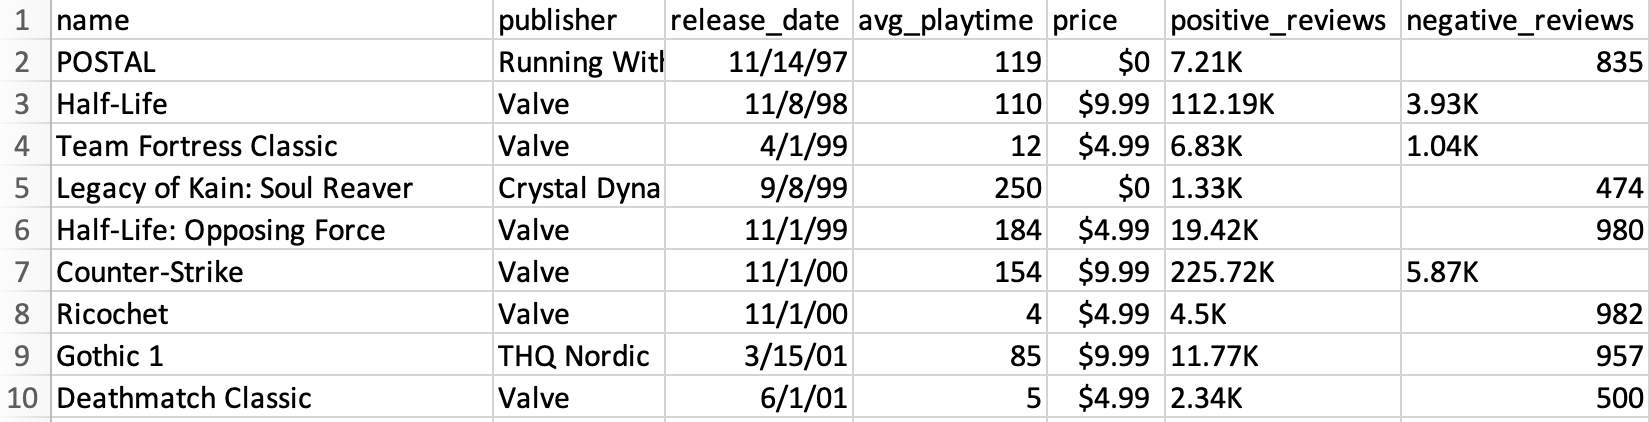

The **index** for the `Team Fortress Classic` is `2` but it is the third entry in the dataset, and it is on **row** `4` of the table. Therefore, you must follow this convention for all the questions asking for the value at a particular **index**.

### Task 2.2: Explore the API
Use the inspection process we learned in [Lab-P3](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s24-projects/-/tree/main/lab-p3) and [Lab-P4](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s24-projects/-/tree/main/lab-p4) to know more details of the 'project' API. In Lab-P3, we saw how to use `dir`, and `help` to learn the API. Run the following cells to explore the API:

In [ ]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project


In [ ]:
# use the 'dir' function to learn more about the project API


Spend some time reading about each of the seven functions that don't begin with two underscores. For example, run this to learn about `count`:

In [ ]:
help(project.count) 

Alternatively, you could run the following to just see the function's documentation:

In [ ]:
print(project.count.__doc__)

You may also open up the `project.py` file directly to learn about the functions provided. E.g., you might see this:

```python
def count():
    """This function will return the number of records in the dataset"""
    return len(__steam__)
```

You don't need to understand the code in the functions, but the strings in triple quotes (called *docstrings*) explain what each function does. As it turns out, all `project.count.__doc__` is providing you is the docstring of the `count` function.

Try to learn other functions in `project.py`, by using `help` function. For example, you may try: 

In [ ]:
help(project.get_name)

In [ ]:
# now try getting help for the other functions in the `project` module


### Task 2.2.1: Getting familiar with `project.py`

You will now demonstrate your familiarity with the functions inside the `project` module by answering a few simple questions. You must have already imported the `project` module to this notebook. Make sure you placed the `import` statememnt at the **top** of the notebook in the designated cell.

**Remember:** In Computer Science, we start indexing at `0`.

**Question 1:** What is the `name` of the game at **index** `0`? 

In [ ]:
# we have done this for you!
name_idx0 = project.get_name(0)

name_idx0

In [ ]:
grader.check("q1")

**Question 2:** What is the `name` of the game at **index** `3`? 

In [ ]:
# replace the ... below with your code
name_idx3 = ...
name_idx3

In [ ]:
grader.check("q2")

**Question 3:** What is the `publisher` of the game at **index** `9`? 

In [ ]:
# replace the ... below with your code
publisher_idx9 = ...
publisher_idx9

In [ ]:
grader.check("q3")

**Question 4:** What is the `name` of the **last** game in the dataset?

In [ ]:
# we have done this for you!
name_idx_last = project.get_name(project.count() - 1)
name_idx_last

In [ ]:
grader.check("q4")

Now, let us try to get the `name` at index `project.count()` instead. What happens? Why? Feel free to reach out to your TA/PM, if you are not sure.

In [ ]:
# execute this cell without changing anything
project.get_name(project.count())

**Question 5:** How many `positive_reviews` does the game at **index** `7` have? 

In [ ]:
# replace the ... below with your code
positive_reviews_idx7 = ...
positive_reviews_idx7

In [ ]:
grader.check("q5")

Notice that this positive review number ends with a `"K"`. In this dataset, `"K"` represents one thousand, and `"M"` represents one million. In P5, you'll need to convert these **strings** to **integers** (e.g., `"11.77K"` should become `11770`, `"2.55M"` should become `2550000`). We will now review some string operations as we build up to how to perform this conversion.

## Segment 3: Working with strings

### Task 3.1: Indexing / slicing Strings

Stepping back from the Steam data, Tasks 3.1 and 3.2 introduce us to performing operations with strings. While this will be covered in more detail during Friday's lecture, we will cover the essentials now.

We can think of a string as a sequence of characters. For example, the string `my_str = 'hello_world!'` can be written as...

| index  | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   | 11   |
| ------ | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| string | h    | e    | l    | l    | o    | _    | w    | o    | r    | l    | d    | !    |

... where we can then access specific characters of the string by an **index**, e.g. `my_str[0]` returns `'h'`, `my_str[1]` returns `'e'`, and `my_str[8]` returns `'r'`.

Furthermore, we can **slice** strings -- that is, get a particular section of characters. For example,

- `my_str[1:5]` returns `'ello'`
- `my_str[:8]` returns `'hello_wo'`
- `my_str[5:]` returns `'_world!'`
- `my_str[:]` returns `'hello_world!'`

Try running this in the cell below.

In [ ]:
my_str = 'hello_world!'
print("my_str[0] returns", my_str[0])
print("my_str[8] returns", my_str[8])
print("my_str[1:5] returns", my_str[1:5])
print("my_str[:8] returns", my_str[:8])
print("my_str[5:] returns", my_str[5:])
print("my_str[:] returns", my_str[:])

Notice that slicing is **inclusive** on the lower bound and **exclusive** on the upper bound. We can also leave out a bound to start from the beginning (e.g. `my_str[:6]`) or to keep going until the end (e.g. `my_str[8:]`). Lastly, a negative index will count **backwards** from the **end** of the string.

Try running the cell below.

In [ ]:
print("my_str[-1] returns", my_str[-1])
print("my_str[-4:-1] returns", my_str[-4:-1])

**Your Turn!** Try slicing the below phone number! Can you extract the area code (first 3 digits), exchange code (middle 3 digits), and line number (last 4 digits) of the given phone number?

**Question 6:** What is the **last digit** of the phone number: `608-867-5309`?

In [ ]:
# replace the ... with your code
phone_number = "608-867-5309"
last_digit = phone_number[...]

last_digit

In [ ]:
grader.check("q6")

**Question 7:** What is the **area code** (i.e., the first three characters) of the phone number: `608-867-5309`?

In [ ]:
# replace the ... with your code
phone_number = "608-867-5309"
area_code = phone_number[:...]

area_code

In [ ]:
grader.check("q7")

**Question 8:** What is the **line number** (i.e., the last four characters) of the phone number: `608-867-5309`?

In [ ]:
# replace the ... with your code
phone_number = "608-867-5309"
line_number = phone_number[...:]

line_number

In [ ]:
grader.check("q8")

**Question 9:** What is the **exchange code** (i.e., middle three characters) of the phone number: `608-867-5309`?

In [ ]:
# replace the ... with your code
phone_number = "608-867-5309"
exchange_code = phone_number[...:...]

exchange_code

In [ ]:
grader.check("q9")

**Question 10:** What is the **department code** (i.e., the letters at the start) of the course: `CS220`?

In [ ]:
course = 'CS220'
dept_code = course[...]

dept_code

In [ ]:
grader.check("q10")

**Question 11:** What is the **course code** (i.e., the numbers at the end) of the course: `CS220`?

In [ ]:
course = 'CS220'
course_code = course[...]

course_code

In [ ]:
grader.check("q11")

After that short detour, we will now go back to working on the Steam game dataset.

### Task 3.2: Calculating Number of Reviews

Question 4 showed us that the number of positive or negative reviews is represented as strings with suffixes for thousands, and millions.

We can **index** the last character of these numbers to find the suffix. We can then potentially use it to determine whether the suffix represents a thousand, or a million.

**Question 12:** What is the **suffix** (i.e., the last character) of the number `"3.19M"`?

In [ ]:
# replace the ... with your code
cost = "3.19M"
suffix = cost[...]

suffix

In [ ]:
grader.check("q12")

**Question 13:** How many millions are there in the number `"3.19M"`?

Just as we found the suffix by **indexing**, we can also find the number by **slicing**. Answer the question by slicing the string to obtain the number of millions, and typecasting the **string** into a **float**.

In [ ]:
# replace the ... with your code
cost = "3.19M"
millions = float(cost[...])

millions

In [ ]:
grader.check("q13")

The idea now is that after using the suffix `'M'` to identify that the string is referring to **millions**, and by using the string **slicing** to identify the number of millions, you can convert the **string** to an **integer** by just performing the following computation.

In [ ]:
round(millions * (10**6)) # note the use of `round` to convert the float to the nearest int

### Task 3.3: Slicing dates

Run the below cell which prints the release date of the first game in the dataset.

In [ ]:
print(project.get_release_date(0))

The dates are represented as a string in `mm/dd/yyyy` notation. **Two digits** are used to represent the month and day even when they can be represented with a single digit, that is, `'9/4/1804'` is represented as `'09/04/1804'`.

To extract the month, we could run the following code...

In [ ]:
project.get_release_date(0)[:2]

Notice, however, that this is the *string* `'11'`.

Write the code to get this as the *int* (e.g. `11`).

**Question 14:** In which `month` is the game at **index** `0` released?

Your answer **must** be an `int` between `1` and `12`. You **must not** hardcode the answer, but use the appropriate function from the `project` module to find the release date of the game.

In [ ]:
# replace the ... with your code
month_idx0 = ...

month_idx0

In [ ]:
grader.check("q14")

### Task 3.4: Helper Functions for Month, Day, and Year

The below functions will be useful in P5. Solve the below questions for getting the day, and year as an int. The function to get the month has already been done for you.

Be aware that for the three functions below, we take a `date` as input (e.g., `"02/21/2024"`), **not** the index of a game. This is because we want these helper functions to be as universal as possible, so that they can be used outside this project. If we take the index of a game as input, these functions will only be applicable in this specific project, and that will not be super helpful.

In [ ]:
def get_month(date):
    """get_month(date) returns the month when the date is the in the 'mm/dd/yyyy' format"""
    return int(date[:2])

You can confirm that `get_month` works by running the cell below.

In [ ]:
month = get_month("02/21/2024")

month

### Task 3.4.1: Define `get_year(date)`

You must now define this function, which will take in the `date` as a `str` and return the `year` as an `int`.

In [ ]:
def get_year(date):
    """get_year(date) returns the year when the date is the in the 'mm/dd/yyyy' format"""
    pass # replace with your code

**Question 15:** What is the `year` in the date `"02/21/2024"`?

You **must** answer this question by calling the `get_year` function.

In [ ]:
# replace the ... with your code
year = ...

year

In [ ]:
grader.check("q15")

### Task 3.4.2: Define `get_day(date)`

You must now define this function, which will take in the `date` as a `str` and return the `day` as an `int`.

In [ ]:
def get_day(date):
    """get_day(date) returns the day when the date is the in the 'mm/dd/yyyy' format"""
    pass # replace with your code

**Question 16:** What is the `day` in the date `"02/21/2024"`?

You **must** answer this question by calling the `get_day` function.

In [ ]:
# replace the ... with your code
day = ...

day

In [ ]:
grader.check("q16")

### Task 3.5: Using Helper Functions

Using the helper functions you made above, complete the following questions.

**Hint:** You'll use these helper functions in combination with functions from the project module.

**Question 17:** On what `day` was the game at **index** `200` released?

You **must** answer this question by calling the `get_day` function. Find the release date of the game using the appropriate function in the `project` module.

In [ ]:
# replace the ... with your code
day_released_idx200 = ...

day_released_idx200

In [ ]:
grader.check("q17")

**Question 18:** In which `year` was the game at **index** `300` released?

You **must** answer this question by calling the `get_year` function.

In [ ]:
# replace with your code
year_released_idx300 = ...

year_released_idx300

In [ ]:
grader.check("q18")

**Question 19:** In which `month` was the game at **index** `400` released?

You **must** answer this question by calling the `get_month` function.

In [ ]:
# replace the ... with your code
month_released_idx400 = ...

month_released_idx400

In [ ]:
grader.check("q19")

## Segment 4: Looping

### Task 4.1: `while` and `for` loops

Run the below code and observe the output.

In [ ]:
i = 0
while i < 5:
    print(i)
    i += 1

Equivalently, we can use `for` and `range(n)`. The `range(n)` function returns a sequence of numbers, from `0` to `n` but not including `n`.

In [ ]:
for i in range(5):
    print(i)

Now, we will try to use `while` and `for` loops to answer a few simple questions.

**Question 20:** What is the sum of the numbers *0 to 25*, both inclusive?

You **must** answer this with a `while` loop. Ask your TA/PM if you are not sure what to do.

In [ ]:
i = 0
sum_while = ... # replace the ... with the correct initial value for the sum
while i ... 25: # replace the ... with the correct comparison operator
    sum_while += i 
    i += 1

sum_while

In [ ]:
grader.check("q20")

**Question 21:** What is the sum of the numbers *0 to 25*, both inclusive?

You **must** answer this with a `for` loop. Ask your TA/PM if you are not sure what to do.

In [ ]:
# replace the ... with your code
sum_for = ...
for i in range(...):
    sum_for += ...

sum_for

In [ ]:
grader.check("q21")

### Task 4.2: Looping through games

You have had some practice with simple looping structures. You will now loop through the Steam game dataset.

Run the below code and observe the output.

In [ ]:
for idx in range(10):
    print(project.get_name(idx))

Can you make the code above display the **year of release** of the first 10 games? How about the **first 15** games? Please feel free to reach out to your TA/PM and ask them for help, if you face any issues.

You are now ready to answer some interesting questions with loops.

**Question 22:** What is the **total** `avg_playtime` (in minutes) of the **first** `10` games in the dataset?

In [ ]:
# replace the ... with your code
total_avg_playtime_first10 = ...
for idx in range(...):
    total_avg_playtime_first10 += ...

total_avg_playtime_first10

In [ ]:
grader.check("q22")

### Task 4.3: Filtering

You will now *filter* the data using an `if` condition as you loop through the dataset.

**Question 23:** How many games were played in average for **at least** 200 minutes in the dataset?

In [ ]:
# replace the ... with your code
num_game_200_minutes = ...
for idx in range(...): # loop through ALL games in the dataset; do NOT hardcode the number here
    if ...: # replace ... with a Boolean expression to check if the average playtime of the game in the current iteration is at least 200
        num_game_200_minutes += 1

num_game_200_minutes

In [ ]:
grader.check("q23")

**Question 24:** How many games have a `name` that **starts** with the letter `'G'` in the dataset?

In [ ]:
# compute and store the answer in the variable 'num_game_g'
# TODO: initialize the variable 'num_game_g'
# TODO: loop through all games in the dataset
# TODO: update the value of 'num_game_g' only if
#       the name of the game at the current idx starts with 'G'
        
# display the variable 'num_game_g' here
num_game_g

In [ ]:
grader.check("q24")

**Question 25:** How many games in the dataset are published by *Ubisoft* (i.e. games whose value of `publisher` equal to `"Ubisoft"`)?

In [ ]:
# compute and store the answer in the variable 'num_game_ubisoft'
# TODO: initialize the variable 'num_game_ubisoft'
# TODO: loop through all games in the dataset
# TODO: update the value of 'num_game_ubisoft' only if
#       the publisher of the game at the current idx is 'Ubisoft'
        
# display the variable 'num_game_ubisoft' here
num_game_ubisoft

In [ ]:
grader.check("q25")

### Task 4.4: Maximization/Minimization

You will now find the maximum/minimum using loops.

**Question 26:** What is the `name` of the game which has the **longest** average playtime (in minutes)?

`None` is a Python keyword which denotes nothing. At the beginning of this loop, by saying `longest_idx = None`, we make no assumptions about what the longest-played game is. Inside the loop, if the `longest_idx` is `None`, since we haven't met a game before, we know this game is our first (and currently the longest-played) game.

Note that in the skeleton code below, we break ties in favor of the game that **appears first** in the dataset. That is because we only update `longest_idx` when the new game is **played strictly longer** than the answer we have so far, so if the game we are looking at right now has the same `avg_playtime`, we keep the answer as the previous one.

In [ ]:
# replace the ... with your code
longest_idx = None
longest_playtime = 0
for idx in range(project.count()):
    current_playtime = ... # find the playtime of the game in the current iteration
    if longest_idx == None or current_playtime > longest_playtime:
        longest_playtime = ... # update the `longest_playtime`
        longest_idx = idx
longest_name = project.get_name(longest_idx)
        
longest_name

In [ ]:
grader.check("q26")

**Question 27:** What is the `name` of the game which has the **shortest** average playtime (`avg_playtime`) in minutes?.

You **must** break ties in favor of the game that appear **first** in the dataset.

In [ ]:
# replace the ... with your code
shortest_idx = None
shortest_playtime = 0
for idx in range(...):
    current_playtime = ...
    if ... or ...:
        shortest_playtime = ...
        shortest_idx = ...
shortest_name = ...
        
shortest_name

In [ ]:
grader.check("q27")

### Task 4.5: More Filtering

You will now create a function that takes in two years `start_year` and `end_year`, and return the number of games that were released between these two years (**both years inclusive**).

You **must** use the `get_year` function you defined above to find the year of release of each game. 

In [ ]:
def count_games_between(start_year, end_year):
    # replace the ... with your code
    num_games = 0
    for idx in range(...):  # loop through all games
        year_released = ... # TODO: find the year of release of the game at idx
        # hint: to find year_released, you first find the date of release and pass that value to
        #       another function you defined before to find the year from that date.
        #       note that you can perform both computations in a single line by passing the
        #       value returned by one function as an argument to another function.
        if ...: # TODO: evaluate if game at idx was released between start_year and end_year
            num_games += 1
    return num_games

**Question 28:** How many games were released between *2000 and 2010*, both inclusive?

You **must** answer this question by calling the `count_games_between` function.

In [ ]:
# we have done this one for you...
games_between_2000_2010 = count_games_between(2000, 2010)

games_between_2000_2010

In [ ]:
grader.check("q28")

**Question 29:** How many games were released between *1901 and 2000*, both inclusive?

You **must** answer this question by calling the `count_games_between` function.

In [ ]:
# replace the ... with your code
games_between_1901_2000 = ...

games_between_1901_2000

In [ ]:
grader.check("q29")

## Segment 5: Fixing Indentation

### Task 5.1: Debugging

The `def`, `if`, and `for` statements above use different levels of **indentation** to encode the meaning of the statement. This means, by just changing the indentation level of some code, you might get invalid code that has a **syntax error** or you might get **valid code** that gives a different, **incorrect result**. Therefore, it is an important skill to decide on the **correct indentation level** for and to recognize a wrong indentation level in a piece of code.

For each of the following questions, you will be provided with a function which has either **syntax/semantic errors** because of **bad indentation**. You **must** fix the indentation to make the functions work as intended.

**Warning:** You **must** fix the errors **only by changing the indentation**, and **not** by writing or deleting any code of your own. 

**Hint:** You can increase the indentation simultaneously for a number of lines by selecting them and hitting the *Tab* key on your keyboard. Similarly, you can decrease their indentation by holding the *Shift* key and then hitting *Tab* on your keyboard.

**Question 30:** Fix the indentation errors in the function below.

In [ ]:
# fix any indentation errors you find in the code below

def count_shorter_than(minutes):
    '''count_shorter_than(minutes) returns the number of games
    with an average playtime less than the given minutes'''
    num_games = 0
    for idx in range(project.count()):
        if project.get_avg_playtime(idx) < minutes:
        num_games += 1
    return num_games

In [ ]:
# execute this cell without changing anything
count_shorter_than_200 = count_shorter_than(200)

count_shorter_than_200

In [ ]:
grader.check("q30")

**Question 31:** Fix the indentation errors in the function below.

Unlike the previous function definition, this one has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

**Hint:** If you are having trouble identifying the error, you should try tracing through the code using the test examples below. Manually open [`steam.csv`](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s24-projects/-/tree/main/lab-p5/steam.csv), then go through the function line by line to confirm that it behaves as it ought to.

In [ ]:
# fix any indentation errors you find in the code below

def count_number_of(publisher):
    '''count_number_of(publisher) returns the number of games
    in the dataset with the given publisher'''
    num_games = 0
    for idx in range(project.count()):
        if project.get_publisher(idx) == publisher:
            num_games += 1
        return num_games

In [ ]:
# execute this cell without changing anything
count_number_of_2K_games = count_number_of("2K")

count_number_of_2K_games

In [ ]:
grader.check("q31")

**Question 32:** Fix the indentation errors in the function below.

This function definition has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

In [ ]:
# fix any indentation errors you find in the code below

def count_played_longer_than(game_idx):
    '''count_played_longer_than(game_idx) returns the number of 
    games in the dataset which were played longer 
    than the game with the given index'''
    num_games = 0
    for idx in range(project.count()):
        if project.get_avg_playtime(idx) > project.get_avg_playtime(game_idx):
            num_games += 1
            return num_games

In [ ]:
# execute this cell without changing anything
count_played_longer_than_0 = count_played_longer_than(0)

count_played_longer_than_0

In [ ]:
grader.check("q32")

**Question 33:** Fix the indentation errors in the function below.

This function definition has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

Note that for calls to the function below to execute, you must have correctly defined the function `get_year` in Task 3.4.1.

In [ ]:
# fix any indentation errors you find in the code below

def find_average_playtime(year):
    '''find_average_playtime(year) returns the average playtime of 
    game in the dataset which were released in the given year'''
    total_playtime = 0
    num_games = 0
    for idx in range(project.count()):
        if get_year(project.get_release_date(idx)) == year:
            total_playtime += project.get_avg_playtime(idx)
        num_games += 1
    return total_playtime/num_games

In [ ]:
# execute this cell without changing anything
find_average_playtime_2023 = find_average_playtime(2023)

find_average_playtime_2023

In [ ]:
grader.check("q33")

**Question 34:** Fix the indentation errors in the function below.

This function definition has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

In [ ]:
# fix any indentation errors you find in the code below

def published_more_than_one(publisher):
    '''published_more_than_one(publisher) returns True if 
    the given publisher published more than one game
    in the dataset and False otherwise'''
    num_games = 0
    for idx in range(project.count()):
        if project.get_publisher(idx) == publisher:
            num_games += 1
        if num_games > 1:
            return True
            return False

In [ ]:
# execute this cell without changing anything
check_more_than_one_grabthegames = published_more_than_one("GrabTheGames")

check_more_than_one_grabthegames

In [ ]:
grader.check("q34")

**Question 35:** Fix the indentation errors in the function below.

This function definition has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

In [ ]:
# fix any indentation errors you find in the code below

def find_played_longest():
    '''find_played_longest() returns the longest
    average playtime of any game in the entire dataset'''
    played_longest_idx = None
    longest_playtime = 0
    for idx in range(project.count()):
        curr_playtime = project.get_avg_playtime(idx)
        if played_longest_idx == None or curr_playtime > longest_playtime:
            played_longest_idx = idx
        longest_playtime = curr_playtime           
    return longest_playtime

In [ ]:
# execute this cell without changing anything
played_longest_game = find_played_longest()

played_longest_game

In [ ]:
grader.check("q35")

**Question 36:** Fix the indentation errors in the function below.

This function definition has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

In [ ]:
# fix any indentation errors you find in the code below

def count_more_published(publisher1, publisher2):
    '''count_more_published(publisher1, publisher2) returns
    which of the two given publisher published more games
    in the dataset, and returns "Draw" if they published
    an equal number of games'''
    num_publisher1 = 0
    num_publisher2 = 0
    for idx in range(project.count()):
        if project.get_publisher(idx) == publisher1:
            num_publisher1 += 1
        elif project.get_publisher(idx) == publisher2:
            num_publisher2 += 1
        if num_publisher1 > num_publisher2:
            return publisher1
        elif num_publisher1 < num_publisher2:
            return publisher2
        else:
            return "Draw"

In [ ]:
# execute this cell without changing anything
count_more_published_valve_ubisoft = count_more_published("Valve", "Ubisoft")

count_more_published_valve_ubisoft

In [ ]:
grader.check("q36")

In [ ]:
grader.check("summary")

## Great work! You are now ready to start [P5](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s24-projects/-/tree/main/p5)

## Submission
It is recommended that at this stage, you Restart and Run all Cells in your notebook.
That will automatically save your work and generate a zip file for you to submit.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. If you completed the project with a **partner**, make sure to **add their name** by clicking "Add Group Member"
in Gradescope when uploading the zip file.
3. Check **Gradescope** results as soon as the auto-grader execution gets completed.
4. Your **final score** for this project is the score that you see on **Gradescope**.
5. You are **allowed** to resubmit on Gradescope as many times as you want to.
6. **Contact** a TA/PM if you lose any points on Gradescope for any **unclear reasons**.

In [ ]:
# running this cell will create a new save checkpoint for your notebook
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

In [ ]:
grader.export(pdf=False, run_tests=False)